#Speech Emotion Recognition with MLP Classifier



# Mount google drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install librosa

In [ ]:
!pip install --upgrade librosa


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.8.1
    Uninstalling librosa-0.8.1:
      Successfully uninstalled librosa-0.8.1


In [ ]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/MyDrive/content/Ravdess/Audio_Song_Actors_01-24/Actor_01/03-02-01-01-01-01-01.wav')

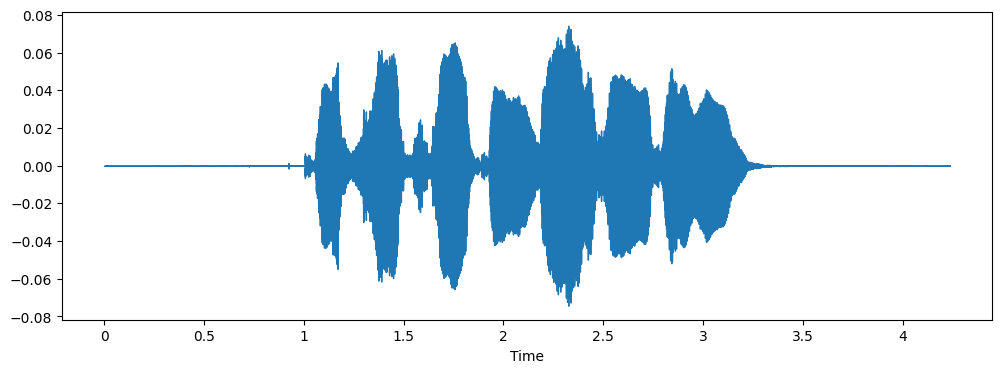

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

In [1]:
import time
import os
path = '/content/drive/My Drive/Ravtess/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 0.0025997161865234375 seconds ---


In [4]:
import joblib
X = joblib.load('/content/X.joblib')
y = joblib.load('/content/y.joblib')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier()

In [8]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       192
           1       0.64      0.57      0.60       123
           2       0.62      0.61      0.61       264
           3       0.70      0.65      0.67       275
           4       0.71      0.72      0.71       252
           5       0.59      0.65      0.62       241
           6       0.67      0.68      0.67       197
           7       0.56      0.57      0.56       190

    accuracy                           0.65      1734
   macro avg       0.65      0.65      0.65      1734
weighted avg       0.66      0.65      0.65      1734



In [12]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [13]:
x_traincnn.shape, x_testcnn.shape

((3518, 40, 1), (1734, 40, 1))

In [14]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [15]:
model = Sequential()

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,672 (819.03 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Activation, Dropout, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))              # 8 emotion classes
model.add(Activation('softmax'))

opt = RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
    run_eagerly=True        # 👈 add this
)

In [39]:
print(x_traincnn.shape)  # -> (3518, 40)   for example
print(x_testcnn.shape)

(3518, 40, 1)
(1734, 40, 1)


In [40]:
import numpy as np

x_traincnn = np.expand_dims(x_traincnn, axis=-1)   # (3518, 40, 1)
x_testcnn  = np.expand_dims(x_testcnn, axis=-1)    # (1734, 40, 1)

In [41]:
y_train.shape
y_test.shape

(1734,)

In [42]:
import numpy as np

x_traincnn = np.expand_dims(x_traincnn, axis=-1)   # (samples, 40, 1)
x_testcnn  = np.expand_dims(x_testcnn, axis=-1)

In [43]:
print(y_train.shape)   # (num_samples,)
print(y_test.shape)    # (num_samples,)

(3518,)
(1734,)


In [44]:
import numpy as np

print("Before fix:", x_traincnn.shape, x_testcnn.shape)

# Remove all extra 1-dimensions
x_traincnn = np.squeeze(x_traincnn)
x_testcnn  = np.squeeze(x_testcnn)

print("After squeeze:", x_traincnn.shape, x_testcnn.shape)

# If after squeeze it's (N, 40), add ONLY ONE channel dimension:
if x_traincnn.ndim == 2:
    x_traincnn = np.expand_dims(x_traincnn, axis=-1)  # (N, 40, 1)
    x_testcnn  = np.expand_dims(x_testcnn, axis=-1)   # (N, 40, 1)

print("Final shape:", x_traincnn.shape, x_testcnn.shape)

Before fix: (3518, 40, 1, 1, 1) (1734, 40, 1, 1, 1)
After squeeze: (3518, 40) (1734, 40)
Final shape: (3518, 40, 1) (1734, 40, 1)


In [45]:
cnnhistory = model.fit(
    x_traincnn,
    y_train,
    batch_size=16,
    epochs=200,
    validation_data=(x_testcnn, y_test),
    verbose=1
)

Epoch 1/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.1391 - loss: 4.6167 - val_accuracy: 0.3749 - val_loss: 1.7940
Epoch 2/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.2416 - loss: 2.8385 - val_accuracy: 0.4798 - val_loss: 1.5234
Epoch 3/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.3406 - loss: 2.0999 - val_accuracy: 0.4983 - val_loss: 1.4297
Epoch 4/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.4457 - loss: 1.7329 - val_accuracy: 0.5854 - val_loss: 1.2881
Epoch 5/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.4742 - loss: 1.5453 - val_accuracy: 0.5606 - val_loss: 1.2646
Epoch 6/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.5031 - loss: 1.4682 - val_accuracy: 0.6119 - val_loss: 1.1425
Epoch 7/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.5350 - loss: 1.3434 - val_accuracy: 0.6315 - val_loss: 1.0944
Epoch 8/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.5701 - loss: 

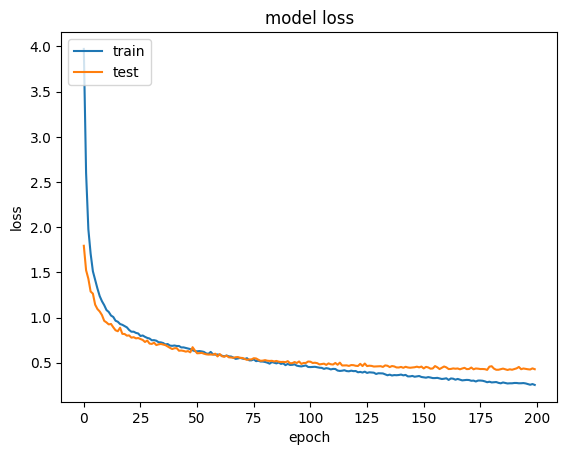

In [46]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

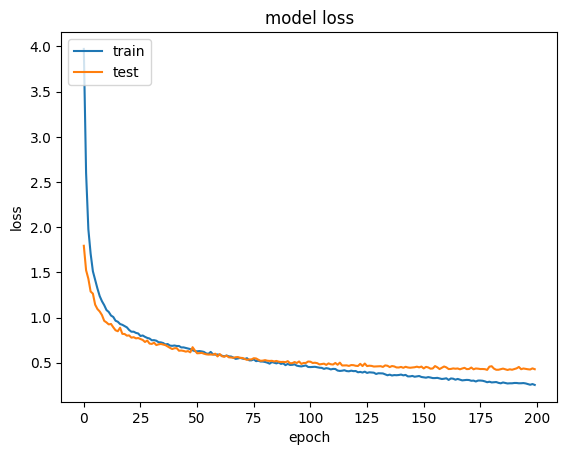

In [47]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
print("Training Accuracy:", cnnhistory.history['accuracy'][-1])
print("Validation Accuracy:", cnnhistory.history['val_accuracy'][-1])

Training Accuracy: 0.9096077084541321
Validation Accuracy: 0.8460207581520081


In [51]:
test_loss, test_acc = model.evaluate(x_testcnn, y_test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.8460207581520081
